## Import packages

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import sys
from PIL import Image

# Add the parent directory to the Python path
parent_dir = os.path.abspath("/workspaces/dynamic_sobel_based_filter/src")
sys.path.append(parent_dir)

from edge_detector import dynamic_edge_detection

## Define Constants

In [8]:
TEST_PATH = "/workspaces/dynamic_sobel_based_filter/images"
OUTPUT_DYNAMIC_PATH = "/workspaces/dynamic_sobel_based_filter/outputs/dynamic_edges"
OUTPUT_SOBEL_PATH = "/workspaces/dynamic_sobel_based_filter/outputs/composed_sobel_edges"


## Read Images

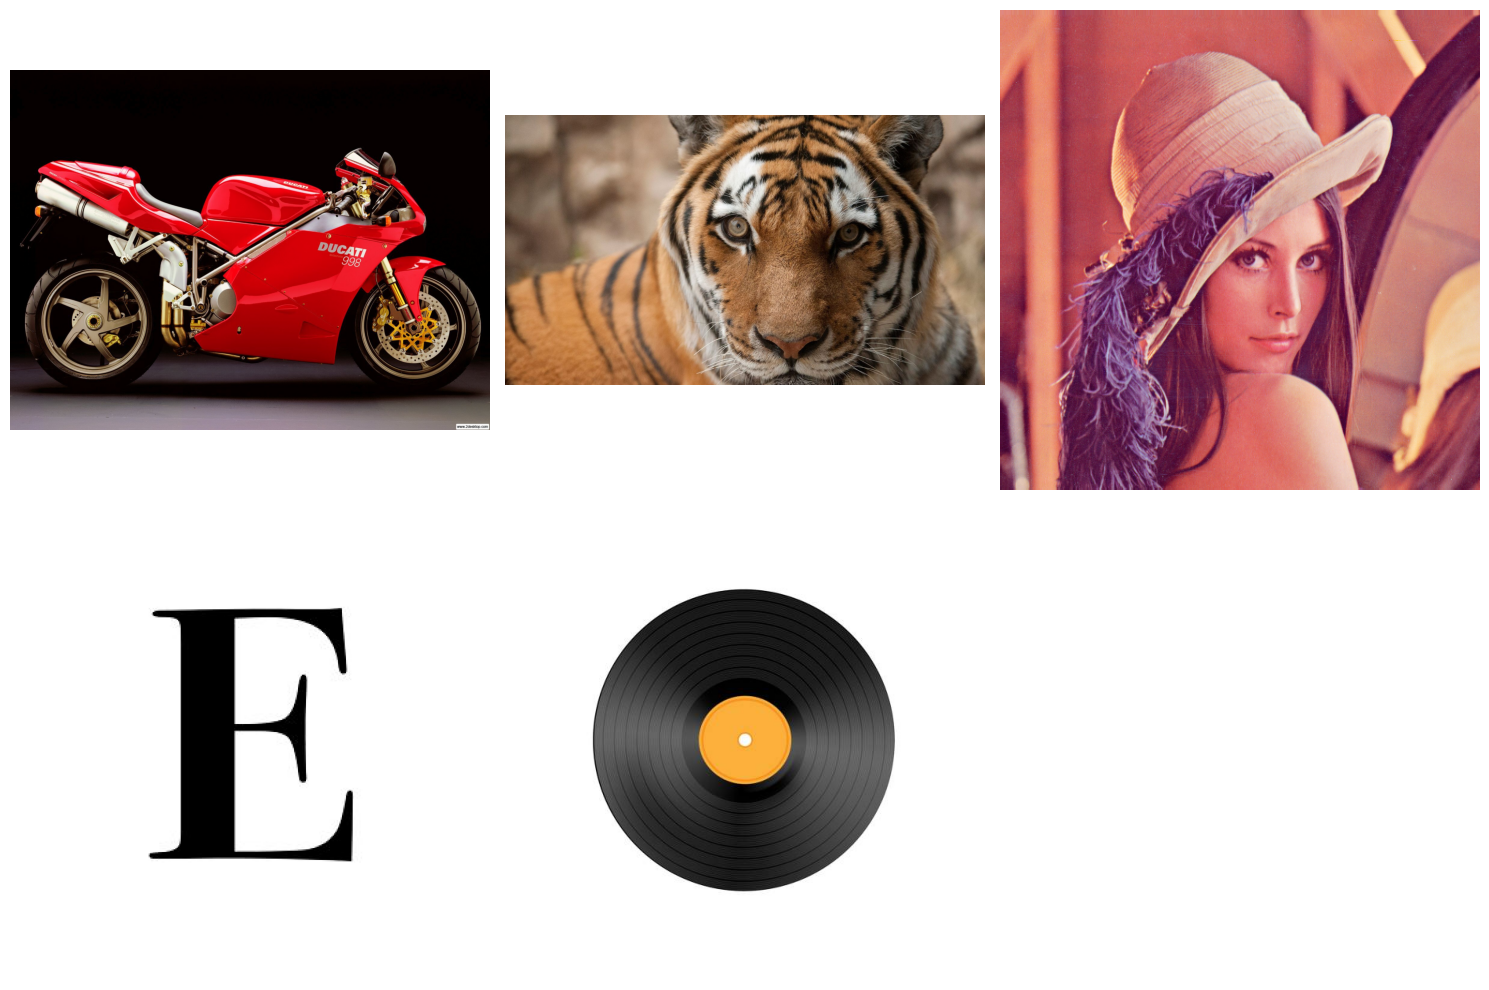

In [11]:
def show_images_in_folder(folder_path):
    # Get list of files in the folder
    files = os.listdir(folder_path)
    # Filter out only image files
    image_files = [f for f in files if f.endswith('.png') or f.endswith('.jpg') or f.endswith('.jpeg')]
    
    # Calculate the number of rows needed
    num_images = len(image_files)
    num_rows = (num_images + 2) // 3  # Round up to the next integer
    
    # Create subplots
    fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
    
    images = []  # List to store loaded images
    for i, ax in enumerate(axes.flat):
        if i < num_images:
            # Load image
            img_path = os.path.join(folder_path, image_files[i])
            img = cv2.imread(img_path)  # Load using OpenCV
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB color
            images.append(img_rgb)
            # Display image
            ax.imshow(img_rgb)
            ax.axis('off')  # Hide axes
        else:
            ax.axis('off')  # Hide empty subplots if there are any
    
    plt.tight_layout()
    plt.show()
    
    return fig, images, image_files

figure, image_list, image_files = show_images_in_folder(TEST_PATH)

## Test Images

In [4]:
# Create an instance of suggested class
ded = dynamic_edge_detection.DynamicEdgeDetection()

In [5]:
# Test the proposed method
dynamic_edges = [ded.convolve(img) for img in image_list]

In [6]:
# Apply sobel filter
composed_sobel_edges = [ded.sobel(img) for img in image_list]

## Results

The rate of detected edges using our approach                         : 8.266%
The rate of detected edges using our composed sobel operators approach: 0.103%

The rate of detected edges using our approach                         : 12.605%
The rate of detected edges using our composed sobel operators approach: 0.131%

The rate of detected edges using our approach                         : 13.202%
The rate of detected edges using our composed sobel operators approach: 0.112%

The rate of detected edges using our approach                         : 4.298%
The rate of detected edges using our composed sobel operators approach: 0.081%

The rate of detected edges using our approach                         : 3.329%
The rate of detected edges using our composed sobel operators approach: 0.057%



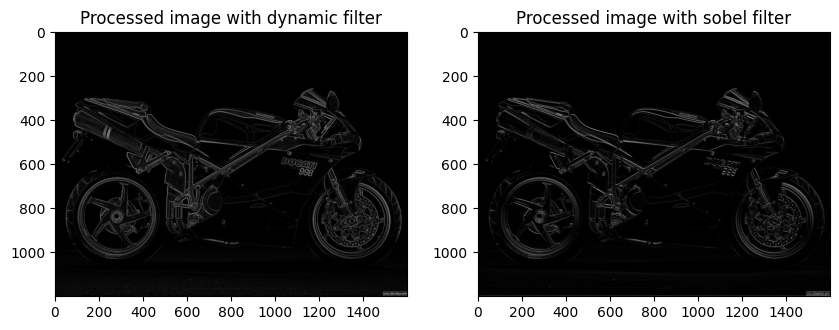

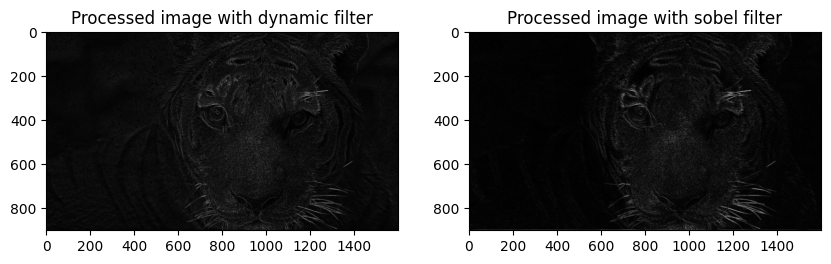

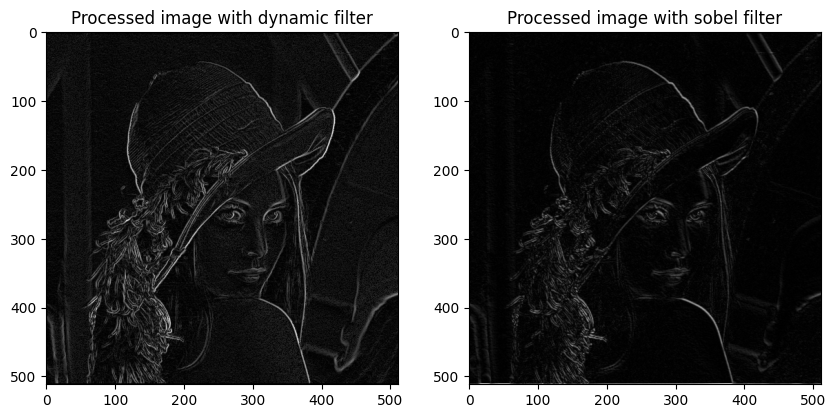

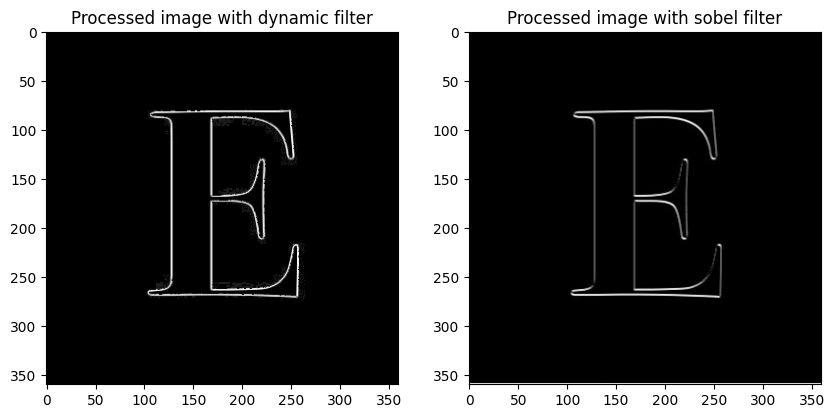

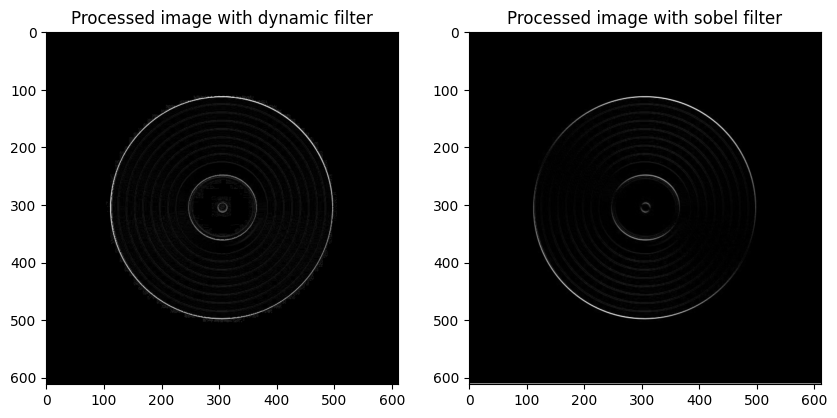

In [20]:
for filename, de, cse in zip(image_files, dynamic_edges, composed_sobel_edges):
    ded.compare_figures(["Processed image with dynamic filter", "Processed image with sobel filter"],
                        [de, cse], [True, True])
    print(f"The rate of detected edges using our approach                         : {de.sum().sum()/(de.shape[0]*de.shape[1])*100:.3f}%")
    print(f"The rate of detected edges using our composed sobel operators approach: {cse.sum().sum()/(cse.shape[0]*cse.shape[1])*100:.3f}%\n")
    
    plt.imsave(os.path.join(OUTPUT_DYNAMIC_PATH, filename), de, cmap='gray')
    plt.imsave(os.path.join(OUTPUT_SOBEL_PATH, filename), cse, cmap='gray')